In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import nltk

from nlu_engine import NLUEngine
from nlu_engine import MacroDataRefinement
from nlu_engine import MacroEntityRefinement

from nlu_engine import DataUtils
from nlu_engine import RenderJSON

from nlu_engine import Analytics

from nlu_engine import EntityExtractor, crf

# Macro NLU Data Refinement

It's a bit like the TV show [Serverance](https://www.imdb.com/title/tt11280740/) .

![Helly R and Mark S](https://media.npr.org/assets/img/2022/02/15/atv_severance_photo_010103-5f8033cc2b219ba64fe265ce893eae4c90e83896-s1100-c50.jpg "Helly R and Mark G")

*Helly R*: `My job is to scroll through the spreadsheet and look for the numbers that feel scary?`

*Mark S*: `I told you, you’ll understand when you see it, so just be patient.`

![MDR](https://www.imore.com/sites/imore.com/files/styles/large/public/field/image/2022/03/refinement-software-severance-apple-tv.jpg "serverance micro data refinement")

*Helly R*: `That was scary. The numbers were scary.`

Hopefully the intents and entities that are wrong aren't scary, just a bit frustrating. Let's see if we can find the right ones.

NOTE: We will use Logistic Regression with TFIDF features to train our intent models and CRFs for entity exraction. Why? Well, they are very fast and both methods aren't state-of-the-art. This is good, because it is easier to find problems we will need to refine in the dataset than if we were to use a proper NLU engine like Snips or something SOTA like BERT. It is very important to note that some of the the problems we will pick up on, might not be an actual issue, but might be due to the limitations of the models. Refining the real problems and ignoring the limitations of the models is a good way to improve the models. Then when the dataset is ready, we can use some more advanced NLU engine and get the best performance possible.

* Macro NLU Data Refinement: Intent
* Macro NLU Data Refinement: Entity


Load the dataset

In [2]:
try:
    nlu_data_df = pd.read_csv(
        'data/refined/nlu_data_refined_df.csv', sep=',', index_col=0)
    print('Successfully loaded nlu_data_refined_df.csv')
except:
    data = 'data/NLU-Data-Home-Domain-Annotated-All-Cleaned.csv'
    nlu_data_df = DataUtils.load_data(
    data
)

Successfully loaded nlu_data_refined_df.csv


In [ ]:
# TODO: Remove this when done.It's just for testing!
data = 'data/NLU-Data-Home-Domain-Annotated-All-Cleaned.csv'
nlu_data_df = DataUtils.load_data(
    data
)

Make sure `nlu_data_df['answer_normalised']` is taken from `nlu_data_df['answer_annotation']`

In [3]:
nlu_data_df = DataUtils.convert_annotated_utterances_to_normalised_utterances(
    nlu_data_df)


In [4]:
from matplotlib.pyplot import axis


We should remove the unwanted entries for the next few steps.

In [5]:
removed_nlu_data_refined_df = nlu_data_df[nlu_data_df['remove'] != True]

# Entity extraction report

The entity extraction could be greatly improved by improving the features it uses. It would be great if someone would take a look at this. Perhaps the CRF features similar to what Snips uses would be better such as Brown clustering (probably).

In [ ]:
#TODO: implement brown clustering to improve entity extraction (see entity_extractor.py)

It is important to have the NLTK tokenizer to be able to extract entities.

In [ ]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
        nltk.download('punkt')

Due to this error featured in [this git issue](https://github.com/TeamHG-Memex/sklearn-crfsuite/issues/60) we have to use an older version of scikit learn (sklearn<0.24), otherwise the latest version would work. Hopefully this gets fixed one day..

In [41]:
entity_report_df = NLUEngine.evaluate_entity_classifier(
    data_df=removed_nlu_data_refined_df, cv=4)

Evaluating entity classifier
Cross validating with CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Time it took to cross validate CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100): 483.17267775535583


/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#TODO graph report for entity types
entity_report_df

We will need to extract out the entity types from the dataset. We need this to calculate the precentage of entities, to filter out any domains that have too few entities for benchmarking by domain instead of all domains together.

In [8]:
removed_nlu_data_refined_df['entity_types'] = removed_nlu_data_refined_df['answer_annotation'].apply(
    EntityExtractor.extract_entities)

/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#TODO: add this as a method to the entity extractor class

In [6]:
import numpy as np

In [9]:
removed_nlu_data_refined_df['entity_types'] = removed_nlu_data_refined_df['entity_types'].apply(lambda y: np.nan if len(y)==0 else y)

/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
removed_nlu_data_refined_df

In [ ]:
#TODO: update the notebook to use this method instead
#TODO: use evaulation to get a better understanding of the data
#TODO: refine entities from domains as individual entities

In [ ]:
domain_entity_reports_df = NLUEngine.get_entity_reports_for_domains(removed_nlu_data_refined_df)

In [24]:
domain_entity_reports_df

,entity-type,precision,recall,f1-score,support,domain
11,accuracy,0.943318,0.943318,0.943318,0.943318,alarm
12,macro avg,0.533857,0.413263,0.440341,2664.000000,alarm
13,weighted avg,0.938813,0.943318,0.936131,2664.000000,alarm
7,accuracy,0.886747,0.886747,0.886747,0.886747,audio
8,macro avg,0.498844,0.468042,0.480933,415.000000,audio
9,weighted avg,0.879680,0.886747,0.881688,415.000000,audio
15,accuracy,0.923426,0.923426,0.923426,0.923426,iot
16,macro avg,0.457024,0.367907,0.399760,4845.000000,iot
17,weighted avg,0.918228,0.923426,0.919459,4845.000000,iot
17,accuracy,0.887753,0.887753,0.887753,0.887753,calendar


In [36]:
domain_entity_reports_df = domain_entity_reports_df[domain_entity_reports_df['entity-type'].str.contains(
    'weighted avg')].sort_values(by='f1-score', ascending=True)

In [30]:
import matplotlib.pyplot as plt

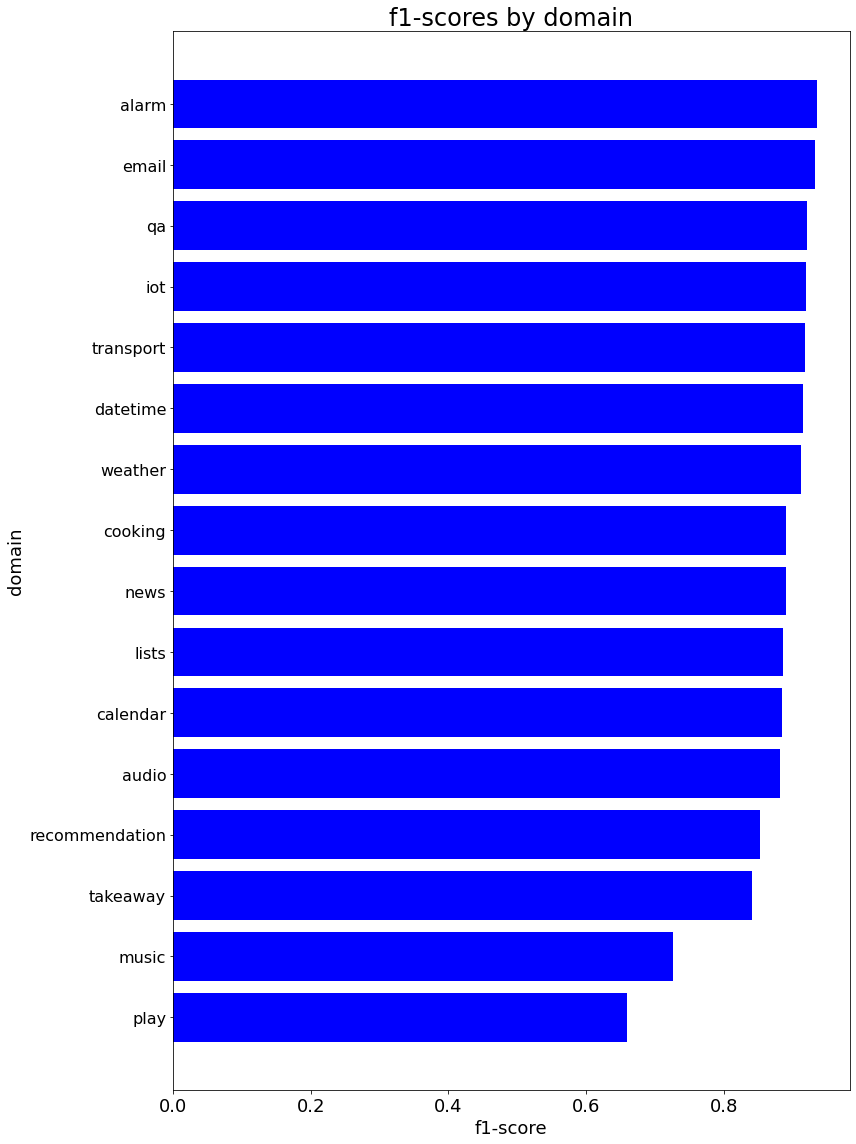

In [37]:
#TODO: rename plot_report to plot_intent_report and this code below should be a method called plot_entity_report
label = domain_entity_reports_df.columns[5]

fig, ax = plt.subplots()
graph_report_df = domain_entity_reports_df.sort_values(
            by='f1-score', ascending=True)
y_axis = np.arange(len(graph_report_df[label]))

ax.barh(y_axis, graph_report_df['f1-score'],
        align='center', color='b')

fig.set_figheight(16)
fig.set_figwidth(12)

ax.set_title(f'f1-scores by {label}', fontsize=24)
ax.set_xlabel("f1-score", fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.set_ylabel(label, fontsize=18)
ax.set_yticks(y_axis, graph_report_df[label], fontsize=16)
fig.tight_layout()

In [ ]:
#TODO: load saved model
#TODO: compare the create_entity_tagged_utterance with the annotated_utterance for what doesn't match
#TODO: Get diff between annotated_utterance and create_entity_tagged_utterance
#TODO: Extract out the entity types that are different from the annotated_utterance
#TODO: Get percentage of failure by entity and graph them

In [ ]:
crf_model = NLUEngine.train_entity_classifier(removed_nlu_data_refined_df)

In [28]:
model_path = 'models/analytics/entity_tagger.sav'

In [ ]:
DataUtils.pickle_model(classifier=crf_model, model_path=model_path)

In [29]:
crf_model = DataUtils.import_pickled_model(model_path)

In [ ]:
annotated_utterance = 'set an alarm for [time : two hours] [time : from now]'


In [38]:
removed_nlu_data_refined_df['predicted_tagging'] = removed_nlu_data_refined_df['answer_normalised'].apply(
    lambda x: NLUEngine.create_entity_tagged_utterance(x, crf_model))

/home/bartmoss/code/NLU-engine-prototype-benchmarks/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
incorrect_predicted_entities_df = removed_nlu_data_refined_df[removed_nlu_data_refined_df['answer_annotation']
                            != removed_nlu_data_refined_df['predicted_tagging']]

In [ ]:
# TODO: write a function that can be applied to the df with the following:
#If an entity from 'answer_annotation' is missing by type or the entity word is different from the predicted_tagging, then count it as a failure.
#TODO: apply function and get out count of failures
#TODO: graph this report by entity type and failure percentage
# From here, we can make the flow

In [ ]:
# TODO: have user choose a domain, make report about entities in the domain,...
# TODO: after the report, does the user clean all entities in the domain at once, or by individual entity type?
# TODO: review from here below, this code is a bit older than the above code

In [ ]:
#TODO: It is probably a good idea to drop all of the ones that lack a good support.
#NOTE: But it didn't work to fix the problem.
remove_entities = [
    'music_album',
    'game_type',
    
]
removed_nlu_data_refined__entities_cleaned_df = removed_nlu_data_refined_df[~removed_nlu_data_refined_df['answer_annotation'].str.contains('|'.join(remove_entities))]

In [ ]:
Analytics.plot_report(entity_report_df)

In [ ]:
#TODO: Remove/replace worst: add in state features like here: https://sklearn-crfsuite.readthedocs.io/en/latest/tutorial.html#let-s-check-what-classifier-learned
# Specifically, we want print_state_features()

In [ ]:
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))


In [ ]:
from nlu_engine import crf
from collections import Counter

In [ ]:
crf_model.state_features_

In [ ]:
print_state_features(Counter(crf.state_features_).most_common(100))

In [ ]:
# TODO: review the most common features, none of them are the word parts (chunks) or POS tags, are these even needed or helpful?
# Can we remove them and speed up the process?
# What other features could be used? Word2vec? Brown clustering?

In [ ]:
domain_selection = MacroDataRefinement.list_and_select_domain(nlu_data_df)

As we have seen from the entity extraction report, the entity extraction is not working for the alarm_type.

In [ ]:
#TODO: review all scoring 0, see if they can be completely dropped or what
entity_to_refine = 'alarm_type'
nlu_scenario_df = removed_nlu_data_refined_df[removed_nlu_data_refined_df['answer_annotation'].str.contains(
    entity_to_refine)]

In [ ]:
nlu_scenario_df

In [ ]:
def remove_entity(df, entity_to_remove):
    """
        Remove all entries of an entity type from the dataframe.
        :param df: pandas dataframe
        :return: pandas dataframe
        """
    updated_df = df.copy()
    updated_df.loc[updated_df['answer_annotation'].str.contains(
        entity_to_remove), 'remove'] = True
    return updated_df


In [ ]:
updated_df = remove_entity(removed_nlu_data_refined_df, entity_to_refine)

In [ ]:
removed_nlu_data_refined_df[removed_nlu_data_refined_df['answer_annotation'].str.contains(
    entity_to_refine)]

## Entity Convert to ipysheet and review
TODO: add in description of the types of fixes we can do to the NLU data for entity


In [ ]:

# TODO: same as above for intents but with predicted entities: report on them, break them down into a dictionary of dataframes and refine them..

For the example with 'alarm' and the alarm_type:
* We see that the alarm_type entities are really event_name(ie wake up, soccer practice) except for ID 5879, we will need to change them to event_name and remove ID 5879.
* The last one(ID 6320) is a mistake. Someone got confused with the prompt and assumed alarm is a security system. This is out of scope for the alarm domain, as the alarms are ones set on a phone or other device. We will drop this utterance.
Once you are done reviewing, you convert it back to a dataframe and check to make sure it looks okay.
Let's change all alarm_type entities to event_name.

In [ ]:

reviewed_scenario_df['answer_annotation'] = reviewed_scenario_df['answer_annotation'].str.replace(
    'alarm_type', 'event_name')
reviewed_scenario_df


Okay dokey, now we can merge this with the original data set and see if it made a difference already(well of course it did!).

In [ ]:
nlu_data_df.drop(
    reviewed_scenario_df[reviewed_scenario_df['remove'] == True].index, inplace=True)

reviewed_scenario_df = reviewed_scenario_df[~reviewed_scenario_df['remove'] == True]

nlu_data_df.loc[nlu_data_df.index.intersection(
    reviewed_scenario_df.index), 'answer_annotation'] = reviewed_scenario_df['answer_annotation']

nlu_data_df[(nlu_data_df['scenario'].str.contains('alarm')) & (nlu_data_df['answer_annotation'].str.contains(
    'event_name'))]


### Benchmark changed data set
TODO: repeat reports for the changed data set for domain and entities and compare


In [ ]:

entity_reviewed_report_df = NLUEngine.evaluate_entity_classifier(
    data_df=nlu_data_df)
entity_reviewed_report_df.sort_values(by=['f1-score'])

If you are sure it is okay, you can save it as a csv file, make sure to name it correctly(i.e. `alarm_domain_first_review.csv`)

In [ ]:
reviewed_scenario_df.to_csv('alarm_domain_first_review.csv')

Load it back up and check to make sure it looks okay. Make sure to give it the right name!


In [ ]:
audio_domain_first_review_df = pd.read_csv(
    'alarm_domain_first_review.csv', index_col=0)
audio_domain_first_review_df.tail(50)


In [ ]:
# TODO: implement the evaluate_classifier in the NLU engine to check f1 score for intents and entities in the domain vs original NLU data of domain!
# Value: benchmark!
#TODO: implement a flow for getting the domains with the lowest f1 scores by intent/domain and entities and cleaning them by the order of the lowest f1 scores
# TODO: concat all reviewed dfs and save to csv
# TODO: add benchmark for whole NLU data set before and after cleaning! (by intents and domains!)
# TODO: review the review marked entries
# TODO: add new column for notes
# TODO: change flow of review for only ones that should be reviewed, not all of the ones that have been changed (track changes by comparing against the original data set)
# TODO: do the changed utterances have to be changed in other fields too or is it just enough for the tagged utterancve field?
# TODO: add visualizations of domains, their intents, keywords in utterances, and entities to top
